In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from extra_functions import perspect_transform, color_thresh, rover_coords

In [2]:
%matplotlib inline

![](polar.svg)

In [3]:
def to_polar_coords(xpix, ypix):
    # Convert from cartesian to polar coordinates
    dist = np.sqrt(xpix**2 + ypix**2)
    angles = np.arctan2(ypix, xpix)
    return dist, angles

In [4]:
image = mpimg.imread('angle_course_sample.jpg')
warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
xpix, ypix = rover_coords(colorsel)
distances, angles = to_polar_coords(xpix, ypix)
avg_angle = np.mean(angles)

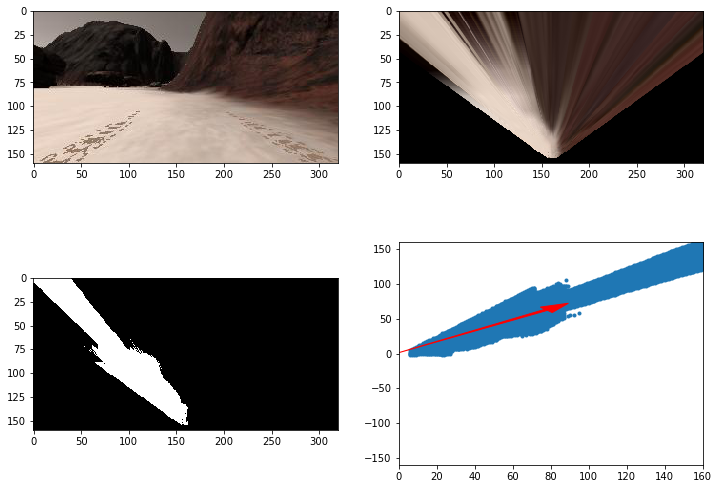

In [7]:
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(colorsel, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()

In [9]:
# The input for steering to rover is in degrees over the range -15 (to the right) or +15 (to the left)
avg_angle_degrees = avg_angle * 180/np.pi
steering = np.clip(avg_angle_degrees, -15, 15)